In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [3]:
data=pd.read_csv("covtype")

In [4]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Soil_Type 40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
data.shape

(581012, 55)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype
---  ------                                    --------------   -----
 0   Elevation                                 581012 non-null  int64
 1   Aspect                                    581012 non-null  int64
 2   Slope                                     581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology          581012 non-null  int64
 4   Vertical_Distance_To_Hydrology            581012 non-null  int64
 5   Horizontal_Distance_To_Roadways           581012 non-null  int64
 6   Hillshade_9am                             581012 non-null  int64
 7   Hillshade_Noon                            581012 non-null  int64
 8   Hillshade_3pm                             581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points        581012 non-null  int64
 10  Wilderness_Area 1                         58

In [7]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Soil_Type 40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Soil_Type 40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
#we are see that any missing dataset
data.isnull().sum()

Elevation                                   0
Aspect                                      0
Slope                                       0
Horizontal_Distance_To_Hydrology            0
Vertical_Distance_To_Hydrology              0
Horizontal_Distance_To_Roadways             0
Hillshade_9am                               0
Hillshade_Noon                              0
Hillshade_3pm                               0
Horizontal_Distance_To_Fire_Points          0
Wilderness_Area 1                           0
Wilderness_Area 2                           0
Wilderness_Area 3                           0
Wilderness_Area 4                           0
Soil_Type 1                                 0
Soil_Type 2                                 0
Soil_Type 3                                 0
Soil_Type 4                                 0
Soil_Type 5                                 0
Soil_Type 6                                 0
Soil_Type 7                                 0
Soil_Type 8                       

C:\Users\MANEESH\.matplotlib\jupiter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


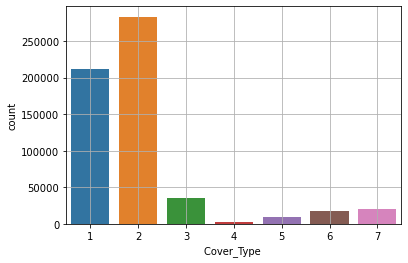

In [10]:
#Data visulization for cover_type
sns.countplot(data.iloc[:,-1])
plt.grid()
plt.show()

In [11]:
# Extract the target variable from train dataset

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
x

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type 31,Soil_Type 32,Soil_Type 33,Soil_Type 34,Soil_Type 35,Soil_Type 36,Soil_Type 37,Soil_Type 38,Soil_Type 39,Soil_Type 40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type , Length: 581012, dtype: int64

In [14]:
# Split train data into train and validation data

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(y_train.shape)

(464809, 54)
(464809,)


In [16]:
print(X_valid.shape)
print(y_valid.shape)

(116203, 54)
(116203,)


In [17]:
 model= DecisionTreeClassifier()
 model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(X_valid)

In [19]:
y_pred

array([2, 2, 3, ..., 2, 2, 1], dtype=int64)

In [20]:
y_valid

215988    2
424155    2
274437    3
65944     2
11015     3
         ..
565516    2
343947    2
80871     2
169606    2
70347     1
Name: Cover_Type , Length: 116203, dtype: int64

In [21]:
print("Accuracy_Score : ",accuracy_score(y_valid,y_pred))

Accuracy_Score :  0.9396315069318348


In [22]:
confusion_matrix(y_valid,y_pred)

array([[39631,  2325,     2,     0,    38,    11,   205],
       [ 2403, 53907,   133,     0,   257,   120,    29],
       [    2,   164,  6611,    48,    19,   250,     0],
       [    0,     0,    73,   462,     0,    34,     0],
       [   34,   258,    13,     0,  1574,     7,     0],
       [    6,   104,   256,    35,     4,  3097,     0],
       [  165,    19,     0,     0,     1,     0,  3906]], dtype=int64)

In [23]:
print(metrics.classification_report(y_valid, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.938     0.939     0.939     42212
           2      0.949     0.948     0.949     56849
           3      0.933     0.932     0.932      7094
           4      0.848     0.812     0.829       569
           5      0.831     0.835     0.833      1886
           6      0.880     0.884     0.882      3502
           7      0.943     0.955     0.949      4091

    accuracy                          0.940    116203
   macro avg      0.903     0.901     0.902    116203
weighted avg      0.940     0.940     0.940    116203

